# KNN

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [95]:
hr = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv')
hr_dummies = pd.get_dummies(hr)


train, test = train_test_split(hr_dummies,
                               test_size=0.3,
                               random_state=300)

In [50]:
train_x = train.drop('Attrition', axis=1)
train_y = train['Attrition']

test_x = test.drop('Attrition', axis=1)
test_y = test['Attrition']

### Algorithm steps
- Identify Euclidean Distance between the one test sample with all training samples
- Sort the training samples in the ascending order of euclidean distance
- Choose K - Neighbors i.e choose first K rows after sorting
- Do polling on target column
- Prediction will be for that class which has highest count

In [16]:
train_x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
178,46,526,1,2,1,244,2,92,3,3,...,0,0,1,0,1,0,0,1,1,0
971,51,1405,11,2,1,1367,4,82,2,4,...,0,0,0,0,0,0,1,1,1,0
1172,29,469,10,3,1,1650,3,42,2,2,...,0,0,1,0,0,0,1,1,1,0
667,41,1085,2,4,1,927,2,57,1,1,...,0,0,0,0,1,0,0,1,0,1
399,31,329,1,2,1,530,4,98,2,1,...,0,0,0,0,0,1,0,1,1,0


In [27]:
from scipy.spatial.distance import euclidean

test_sample = test_x.iloc[0]
df_eds = pd.DataFrame(columns=['index', 'euclidean'])

for index, row in train_x.iterrows():
    curr_ed = euclidean(test_sample.values, row.values)
    df_eds = df_eds.append({'index': index,
                            'euclidean': curr_ed}, ignore_index=True)
df_eds = df_eds.sort_values(by='euclidean')
neigbors = df_eds.head()

train_y.loc[neigbors['index']].value_counts().index[0]

0

Accuracy: 0.80
             precision    recall  f1-score   support

          0       0.84      0.94      0.89       371
          1       0.15      0.06      0.08        70

avg / total       0.73      0.80      0.76       441



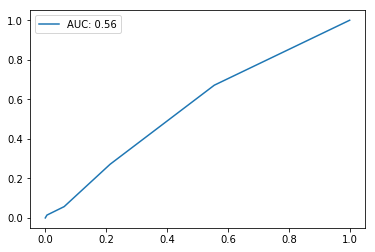

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_x, train_y)
pred_class = model.predict(test_x)
pred_probs = pd.DataFrame(model.predict_proba(test_x),
                         columns=['Neg', 'Pos'])
print('Accuracy: %.2f' % accuracy_score(test_y, pred_class))
print(classification_report(test_y, pred_class))

fpr_knn, tpr_knn, thresholds = roc_curve(test_y, pred_probs['Pos'])
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn)
plt.legend(['AUC: %.2f' % auc_knn])

In [47]:
data['class'].unique()

array(['EDIBLE', 'POISONOUS'], dtype=object)

Accuracy: 1.00
             precision    recall  f1-score   support

     EDIBLE       1.00      1.00      1.00      1348
  POISONOUS       1.00      1.00      1.00      1177

avg / total       1.00      1.00      1.00      2525



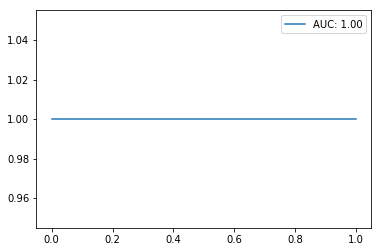

In [48]:
mushroom = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/mushroom_full.csv')

target_col = 'class'
data = mushroom
data_dummies = pd.get_dummies(data.drop(target_col, axis=1))
data_dummies[target_col] = data[target_col]


train, test = train_test_split(data_dummies,
                               test_size=0.3,
                               random_state=100)

train_x = train.drop(target_col, axis=1)
train_y = train[target_col]

test_x = test.drop(target_col, axis=1)
test_y = test[target_col]

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_x, train_y)
pred_class = model.predict(test_x)
pred_probs = pd.DataFrame(model.predict_proba(test_x),
                         columns=['Neg', 'Pos'])
print('Accuracy: %.2f' % accuracy_score(test_y, pred_class))
print(classification_report(test_y, pred_class))

fpr_knn, tpr_knn, thresholds = roc_curve(test_y,
                                         pred_probs['Pos'],
                                        pos_label='POISONOUS')
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn)
plt.legend(['AUC: %.2f' % auc_knn])

## Hyper Parameter Tuning

In [58]:
from sklearn.tree import DecisionTreeClassifier

# depth=1
depths = []
train_errors = []
test_errors = []
for depth in range(1, 30):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train_x, train_y)
    train_predict_class = model.predict(train_x)
    test_predict_class = model.predict(test_x)
    train_error = 1 - accuracy_score(train_y, train_predict_class)
    test_error = 1 - accuracy_score(test_y, test_predict_class)  
    depths.append(depth)
    train_errors.append(train_error)
    test_errors.append(test_error)

Text(0,0.5,'Error rate')

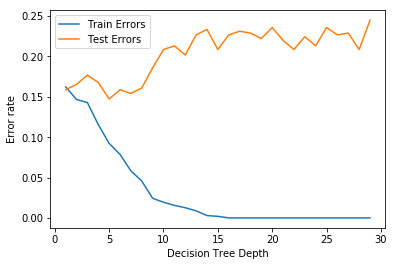

In [63]:
plt.plot(depths, train_errors)
plt.plot(depths, test_errors)
plt.legend(['Train Errors', 'Test Errors'])
plt.xlabel('Decision Tree Depth')
plt.ylabel('Error rate')

## Cross Validation

In [86]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=100, max_depth=1)
cv_results = cross_val_score(model, train_x, train_y, cv=10)
cv_results

array([0.83653846, 0.83653846, 0.83495146, 0.83495146, 0.82524272,
       0.83495146, 0.83495146, 0.83333333, 0.84313725, 0.81372549])

In [87]:
print(cv_results.mean())
print(cv_results.var())

0.8328321545197616
5.745496193345417e-05


In [103]:
depths = []
errors = []
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=100,
                                   max_depth=depth)
    cv_results = cross_val_score(model, train_x, train_y, cv=10)
    avg_acc = cv_results.mean()
    avg_err = 1 - avg_acc
    depths.append(depth)
    errors.append(avg_err)

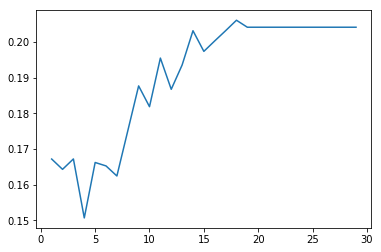

In [104]:
plt.plot(depths, errors)

## Grid Search CV

In [122]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(1,30)),
          'criterion': ['gini', 'entropy']}
base_estimator = DecisionTreeClassifier(random_state=100)
cv_model = GridSearchCV(base_estimator,
                        param_grid=params,
                        cv=10,
                       scoring='f1')
cv_model.fit(train_x, train_y)
  

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [118]:
cv_model.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [121]:
#cv_model.grid_scores_
list(zip(cv_model.cv_results_['params'],
         cv_model.cv_results_['mean_test_score']))

[({'criterion': 'gini', 'max_depth': 1}, 0.8328474246841594),
 ({'criterion': 'gini', 'max_depth': 2}, 0.8357628765792031),
 ({'criterion': 'gini', 'max_depth': 3}, 0.8328474246841594),
 ({'criterion': 'gini', 'max_depth': 4}, 0.8493683187560739),
 ({'criterion': 'gini', 'max_depth': 5}, 0.8338192419825073),
 ({'criterion': 'gini', 'max_depth': 6}, 0.8347910592808552),
 ({'criterion': 'gini', 'max_depth': 7}, 0.8377065111758989),
 ({'criterion': 'gini', 'max_depth': 8}, 0.8250728862973761),
 ({'criterion': 'gini', 'max_depth': 9}, 0.8124392614188533),
 ({'criterion': 'gini', 'max_depth': 10}, 0.8182701652089407),
 ({'criterion': 'gini', 'max_depth': 11}, 0.8046647230320699),
 ({'criterion': 'gini', 'max_depth': 12}, 0.8134110787172012),
 ({'criterion': 'gini', 'max_depth': 13}, 0.8066083576287658),
 ({'criterion': 'gini', 'max_depth': 14}, 0.7968901846452867),
 ({'criterion': 'gini', 'max_depth': 15}, 0.8027210884353742),
 ({'criterion': 'gini', 'max_depth': 16}, 0.7998056365403304),
 

In [113]:
cv_model.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.00225055, 0.00263367, 0.00328114, 0.00401728, 0.00483215,
        0.00548651, 0.00620637, 0.00668437, 0.00729189, 0.00792558,
        0.00831187, 0.00826321, 0.00825226, 0.00815282, 0.00837963,
        0.00831473, 0.00824866, 0.00819774, 0.00820663, 0.00823948,
        0.00818944, 0.0082417 , 0.00823207, 0.00821002, 0.0082351 ,
        0.00826232, 0.00822477, 0.00820894, 0.00822203]),
 'std_fit_time': array([4.18266735e-04, 2.62035755e-04, 6.48382340e-05, 4.74911676e-05,
        2.04272727e-04, 1.11394276e-04, 1.86391284e-04, 9.47917640e-05,
        3.06174577e-04, 2.69196602e-04, 6.04857102e-04, 4.99099376e-04,
        6.83318356e-04, 5.00292483e-04, 4.50364366e-04, 5.16429626e-04,
        4.82233038e-04, 4.47076234e-04, 5.07960241e-04, 5.76647462e-04,
        4.96635984e-04, 5.01300492e-04, 4.52764776e-04, 4.62973584e-04,
        4.85156704e-04, 5.57986563e-04, 5.36520600e-04, 5.02918523e-04,
        4.89488313e-04]),
 'mean_score_time': array([0.0003412 , 